# Machine Learning

## EDA 

### train/test split

In [20]:
from sklearn.model_selectionlection import train_test_split

```python 
train_df, test_df = (
    train_test_split(data, test_size=0.2, 
                     random_state=123, shuffle=True, stratify=None)

X_train, y_train = train_df.drop(columns= ["target"]), train_df["target"]
X_test, y_test = test_df.drop(columns= ["target"]), train_df["target"]
```

------

## Preprocessing

### Pipeline 
To make pipeline with custom named steps.

In [57]:
from sklearn.pipeline import Pipeline

Pipeline(
    steps=[
        ("vect", CountVectorizer(max_features=5000)),
        ("clf", LogisticRegression(max_iter=5000)),
])


Pipeline(steps=[('vect', CountVectorizer(max_features=5000)),
                ('clf', LogisticRegression(max_iter=5000))])

In [76]:
from sklearn.pipeline import make_pipeline

make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler(), 
    KNeighborsRegressor()
)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

### Column Transformer

In [105]:
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

#### Numeric features

In [100]:
from sklearn.preprocessing import StandardScaler

#### Categorical features

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#### Text features

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
make_column_transformer(    
    (StandardScaler(), numeric_feats),  # scaling on numeric features
    ("passthrough", passthrough_feats),  # no transformations on the binary features    
    (OneHotEncoder(), categorical_feats),  # OHE on categorical features
    ("drop", drop_feats),  # drop the drop features
)

column_names = (
    numeric_feats
    + passthrough_feats    
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)
column_names

In [ ]:
make_column_transformer(
    (
        make_pipeline(SimpleImputer(), StandardScaler()),
        numeric_feats,
    ),  # scaling on numeric features
    (
        OrdinalEncoder(categories=[class_attendance_levels], dtype=int),
        ordinal_feats,
    ),  # Ordinal encoding on ordinal features
    (
        OneHotEncoder(drop="if_binary", dtype=int),
        binary_feats,
    ),  # OHE on categorical features
    ("passthrough", passthrough_feats),  # no transformations on the binary features    
    (
        OneHotEncoder(handle_unknown="ignore"),
        categorical_feats,
    ),  # OHE on categorical features
)

In [ ]:
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
)

In [74]:
OneHotEncoder(handle_unknown="ignore", drop='if_binary', sparse=False)

OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
CountVectorizer(stop_words='english')

CountVectorizer(stop_words='english')

----

## Feature Selection

In [9]:
from sklearn.feature_selection import RFECV

-----

## Classification Model

### Baseline Dummy Model

In [62]:
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor

In [63]:
DummyClassifier(strategy="most_frequent")

DummyClassifier(strategy='most_frequent')

### DecisionTreeClassifier
```python
param_grid = {"max_depth": np.arange(1, 20, 2)}
```

In [77]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier(max_depth=5)

### KNN 
Especially prone to curse of dimensionality.
```python
{"n_neighbors": np.arange(1, 50, 5)}
```

In [48]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier(n_neighbors=5)

KNeighborsClassifier()

### SVC RBF
```python
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}
```

In [52]:
from sklearn.svm import SVC

SVC(gamma=0.01)

SVC(gamma=0.01)

### LinearRegression

In [53]:
from sklearn.linear_model import LinearRegression

### [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [68]:
from sklearn.linear_model import LogisticRegression

LogisticRegression()

LogisticRegression()

### [LightGBM Classifier](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

In [ ]:
from lightgbm.sklearn import LGBMClassifier

----

## Regression Model

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

----

## Cross Validation
- Cross-validation: evaluating estimator performance - https://scikit-learn.org/stable/modules/cross_validation.html#stratification

### cross_validate
`cross_val_score` and `cross_validate` functions do not shuffle the data. 

In [40]:
from sklearn.model_selection import cross_val_score, cross_validate

```python
# list of validation scores
cross_val_score(model, X_train, y_train, cv=10)

# more powerful than cross_val_score
# access to both training and validation scores
cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
```

```python 
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)

# table summarizing mean scores 
pd.DataFrame(pd.DataFrame(scores).mean())
```

<div>
    <img src="imgs/cross_validate.png" width="800"/>
</div>

### StratifiedKFold

### [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

In [10]:
from sklearn.linear_model import RidgeCV

----

## Hyperparameter Optimization

### [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV

In [78]:
def display_heatmap(param_grid, pipe, X_train, y_train):
    grid_search = GridSearchCV(
        pipe, param_grid, cv=5, n_jobs=-1, return_train_score=True
    )
    grid_search.fit(X_train, y_train)
    results = pd.DataFrame(grid_search.cv_results_)
    scores = np.array(results.mean_test_score).reshape(6, 6)

    # plot the mean cross-validation scores
    mglearn.tools.heatmap(
        scores,
        xlabel="gamma",
        xticklabels=param_grid["svc__gamma"],
        ylabel="C",
        yticklabels=param_grid["svc__C"],
        cmap="viridis",
    );

In [79]:
from scipy.stats import expon, lognorm, loguniform, randint, uniform, norm

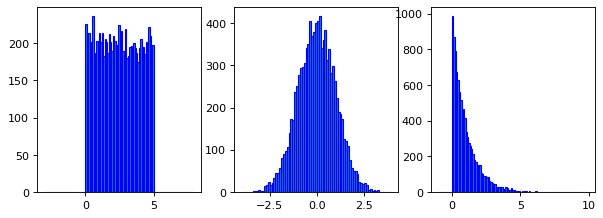

In [96]:
from scipy.stats import expon, lognorm, loguniform, randint, uniform, norm
from matplotlib.pyplot import figure
figure(figsize=(9, 3), dpi=80)

#
y = uniform.rvs(0, 5, 10000)
bin = np.arange(-3,8,0.1)  
plt.subplot(1,3,1)
plt.hist(y, bins=bin, edgecolor='blue') 

#
y = norm.rvs(0, 1, 10000)
bin = np.arange(-4,4,0.1)  
plt.subplot(1,3,2)
plt.hist(y, bins=bin, edgecolor='blue')

#
y = expon.rvs(0, 1, 10000)
bin = np.arange(-1,10,0.1)  
plt.subplot(1,3,3)
plt.hist(y, bins=bin, edgecolor='blue') 


plt.show()

- hyperopt-sklearn
- auto-sklearn
- SigOptSearchCV
- TPOT
- hyperopt
- hyperband
- SMAC
- MOE
- pybo
- spearmint
- BayesOpt

In [ ]:
### Interpretation 

```python 
# by Varada Kolhatkar
from sklearn.metrics import ConfusionMatrixDisplay

pipe.fit(X_train, y_train)
disp = ConfusionMatrixDisplay.from_estimator(
    pipe,
    X_valid,
    y_valid,
    display_labels=["Non fraud", "fraud"],
    values_format="d",
    cmap=plt.cm.Blues,
    colorbar=False,
);
```

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = pipe.predict(X_valid)
TN, FP, FN, TP = confusion_matrix(y_valid, predictions).ravel()
plot_confusion_matrix_example(TN, FP, FN, TP)

Precision-Recall curve


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_valid, pipe_lr.predict_proba(X_valid)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_valid, pipe_lr.predict(X_valid)),
    recall_score(y_valid, pipe_lr.predict(X_valid)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");

In [97]:
## ROC curve

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, pipe_lr.predict_proba(X_valid)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");